In [ ]:
pip install extra-keras-datasets

INFO:root:Loading dataset = emnist


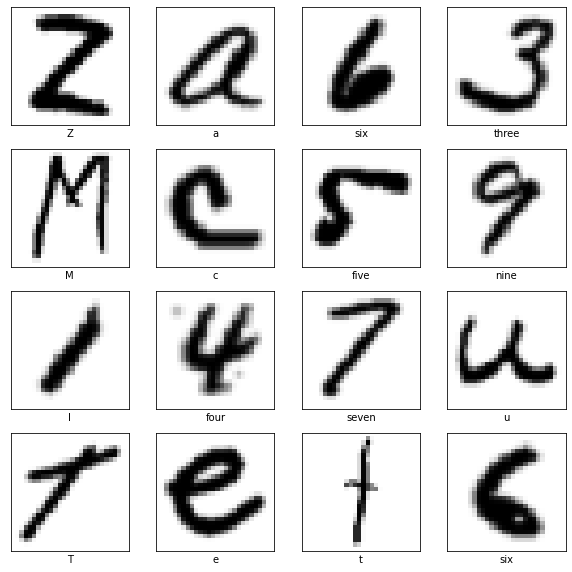

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from extra_keras_datasets import emnist

(x_train, y_train), (x_test, y_test) = emnist.load_data(type='byclass')

class_names = ['zero', 'one', 'two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine',
               'A', 'B', 'C', 'D', 'E', 'F',
               'G', 'H', 'I', 'J', 'K', 'L',
               'M', 'N', 'O', 'P', 'Q', 'R',
               'S', 'T', 'U', 'V', 'W', 'X',
               'Y', 'Z', 'a', 'b', 'c', 'd',
               'e', 'f', 'g', 'h', 'i', 'j',
               'k', 'l', 'm', 'n', 'o', 'p',
               'q', 'r', 's', 't', 'u', 'v',
               'w', 'x', 'y', 'z']
y_train[0]
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
x_train.shape

(697932, 28, 28)

In [ ]:
x_train = x_train.reshape(len(x_train), 28, 28).astype('float32') / 255.0
x_test = x_test.reshape(len(x_test), 28, 28).astype('float32') / 255.0

model = models.Sequential()
model.add(layers.Conv2D(50, (3, 3), activation='relu', input_shape=(28, 28, 1))) #convolutional layer w/ ReLU activation function w/ 50 kernels 3 x 3 dimension
model.add(layers.MaxPooling2D((2, 2))) #1st max pooling layer
model.add(layers.Conv2D(45, (3, 3), activation='relu'))#2nd convolutional layer w/ ReLU activation function w/ 50 kernels 3 x 3 dimension
model.add(layers.MaxPooling2D((2, 2))) #2nd max pooling layer
model.add(layers.Conv2D(40, (3, 3), activation='relu'))#3rd convolutional layer w/ ReLU activation function w/ 50 kernels 3 x 3 dimension
model.add(layers.MaxPooling2D((2, 2))) #3r max pooling layer
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(62, activation = 'softmax'))
model.summary()

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 45)        20295     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 45)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 40)          16240     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 40)         0

3636/3636 - 38s - loss: 0.4526 - accuracy: 0.8404 - 38s/epoch - 11ms/step
0.8403841257095337


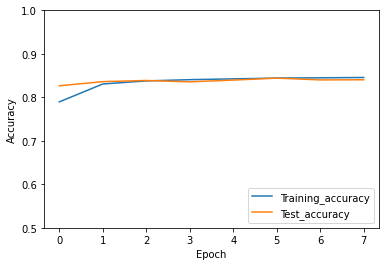

In [ ]:
plt.plot(history.history['accuracy'], label='Training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

In [ ]:
# Convert Keras model to TF Lite format.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_float_model = converter.convert()

# Show model size in KBs.
float_model_size = len(tflite_float_model) / 1024
print('Float model size = %dKBs.' % float_model_size)

INFO:tensorflow:Assets written to: /tmp/tmphjzhz0nx/assets


INFO:tensorflow:Assets written to: /tmp/tmphjzhz0nx/assets


Float model size = 199KBs.


In [ ]:
# Re-convert the model to TF Lite using quantization.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Show model size in KBs.
quantized_model_size = len(tflite_quantized_model) / 1024
print('Quantized model size = %dKBs,' % quantized_model_size)
print('which is about %d%% of the float model size.'\
      % (quantized_model_size * 100 / float_model_size))

INFO:tensorflow:Assets written to: /tmp/tmpvpfp2s69/assets


INFO:tensorflow:Assets written to: /tmp/tmpvpfp2s69/assets


Quantized model size = 56KBs,
which is about 28% of the float model size.


In [ ]:
# Save the quantized model to file to the Downloads directory
f = open('emnist.tflite', "wb")
f.write(tflite_quantized_model)
f.close()

# Download the digit classification model
from google.colab import files
files.download('emnist.tflite')

print('`emnist.tflite` has been downloaded')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

`mnist.tflite` has been downloaded
